# Importing Libraries

In [1]:
!pip install kneed

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from matplotlib import cm
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Loading the Data

In [5]:
data = pd.read_csv('/content/Customer-Data - 2.csv')

In [ ]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# checking for null values
data.isna().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [6]:
data.dtypes

,0
CUST_ID,object
BALANCE,float64
BALANCE_FREQUENCY,float64
PURCHASES,float64
ONEOFF_PURCHASES,float64
INSTALLMENTS_PURCHASES,float64
CASH_ADVANCE,float64
PURCHASES_FREQUENCY,float64
ONEOFF_PURCHASES_FREQUENCY,float64
PURCHASES_INSTALLMENTS_FREQUENCY,float64


In [7]:
# getting statistical measures of the data
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204822,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634780,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
# filling null values

data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace = True)

In [9]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace = True)

In [10]:
data.isna().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [11]:
# deleting CUST_ID column as it is not necessary in any way
data = data.drop("CUST_ID", axis='columns')

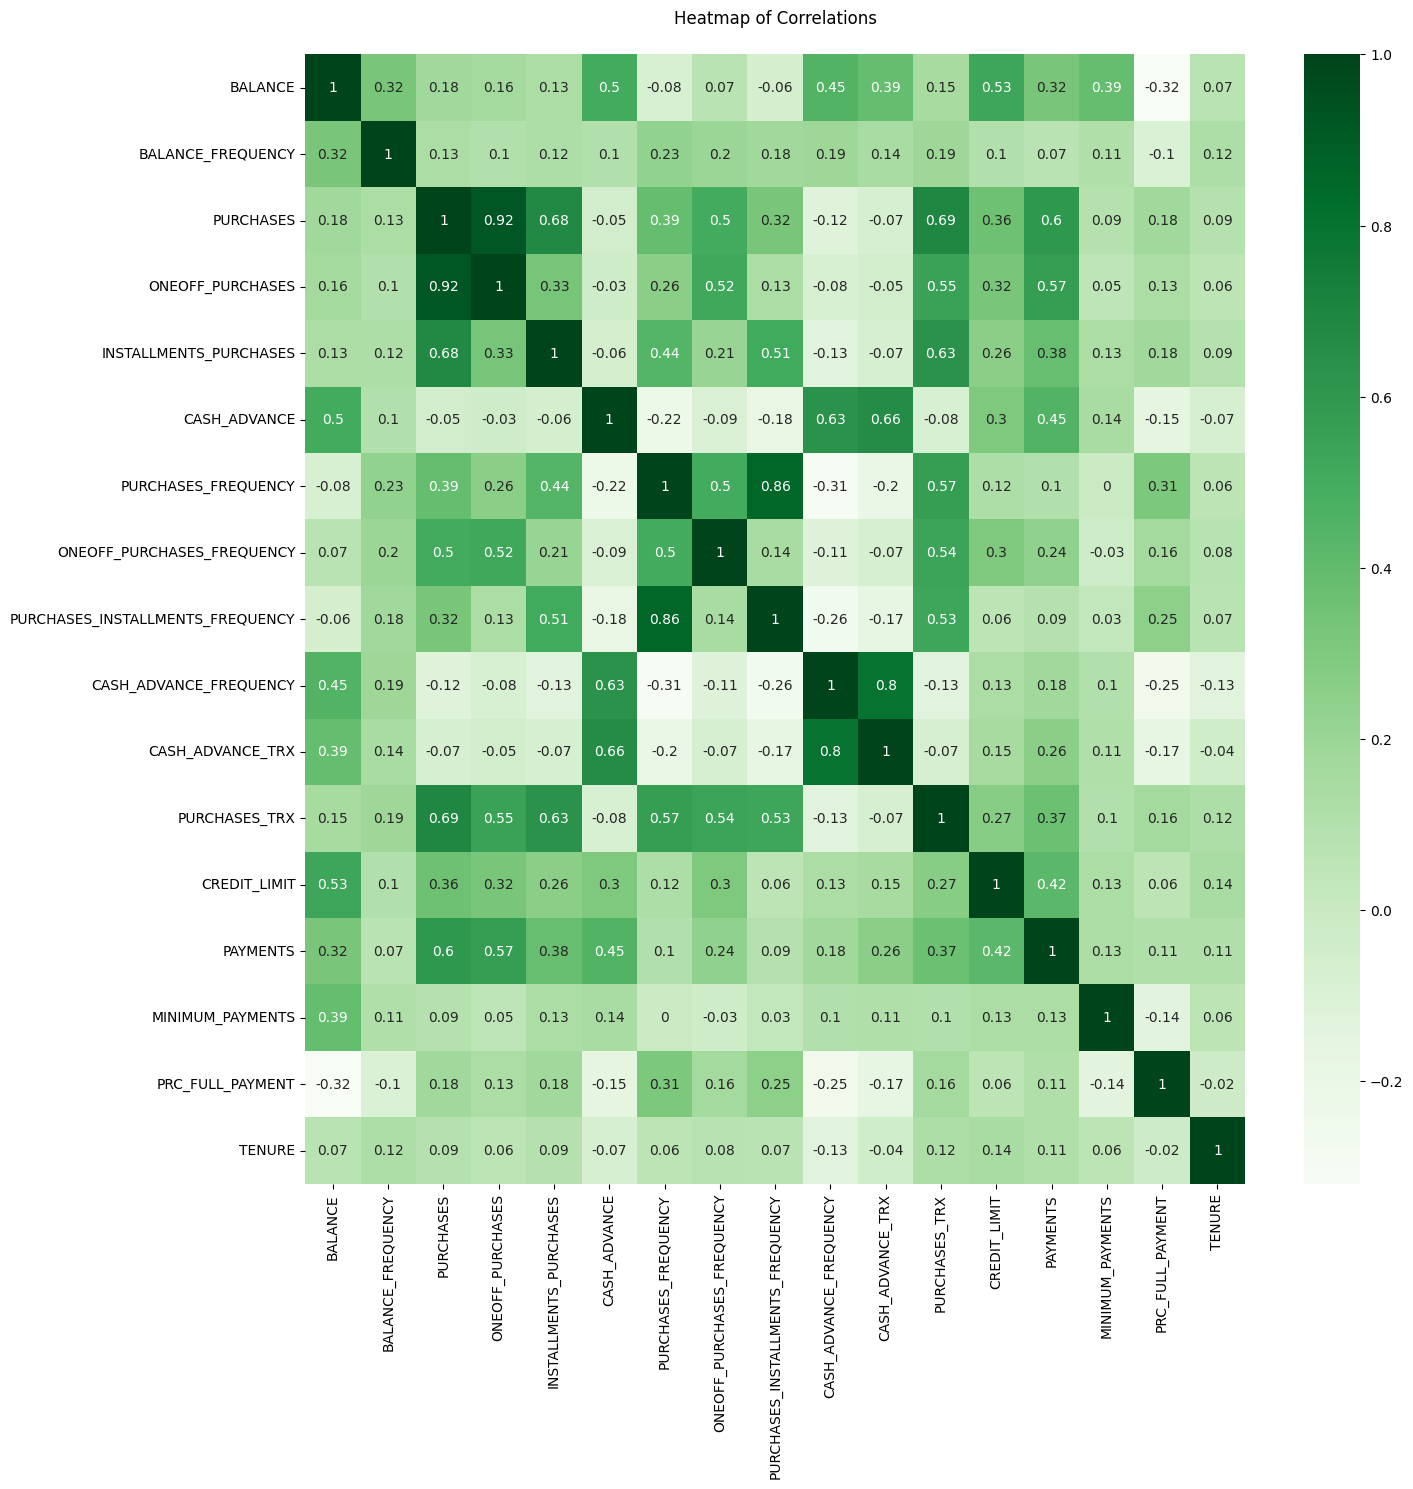

In [12]:
# cunstructing heatmap to check for variable correlations
plt.figure(figsize=(15,15))
sns.heatmap(round(data.corr(),2), cmap='Greens', annot=True)
plt.title('Heatmap of Correlations', y=1.02)
plt.tight_layout()
plt.show()

1. According to the above diagram, it is clear that two features **PURCHASES** and **ONEOFF_PURCHASES** have a high correlation with each other (0.92).

2. Two columns **PURCHASES_FREQUENCY** and **PURCHASES_INSTALLMENTS_FREQUENCY** also have a correlation of 0.86.

3. Two columns **CASH_ADVANCE_FREQUENCY** and **CASH_ADVANCE_TRX** also have a correlation of 0.80.

4. Other features and their correlation with each other can be interpreted and checked.


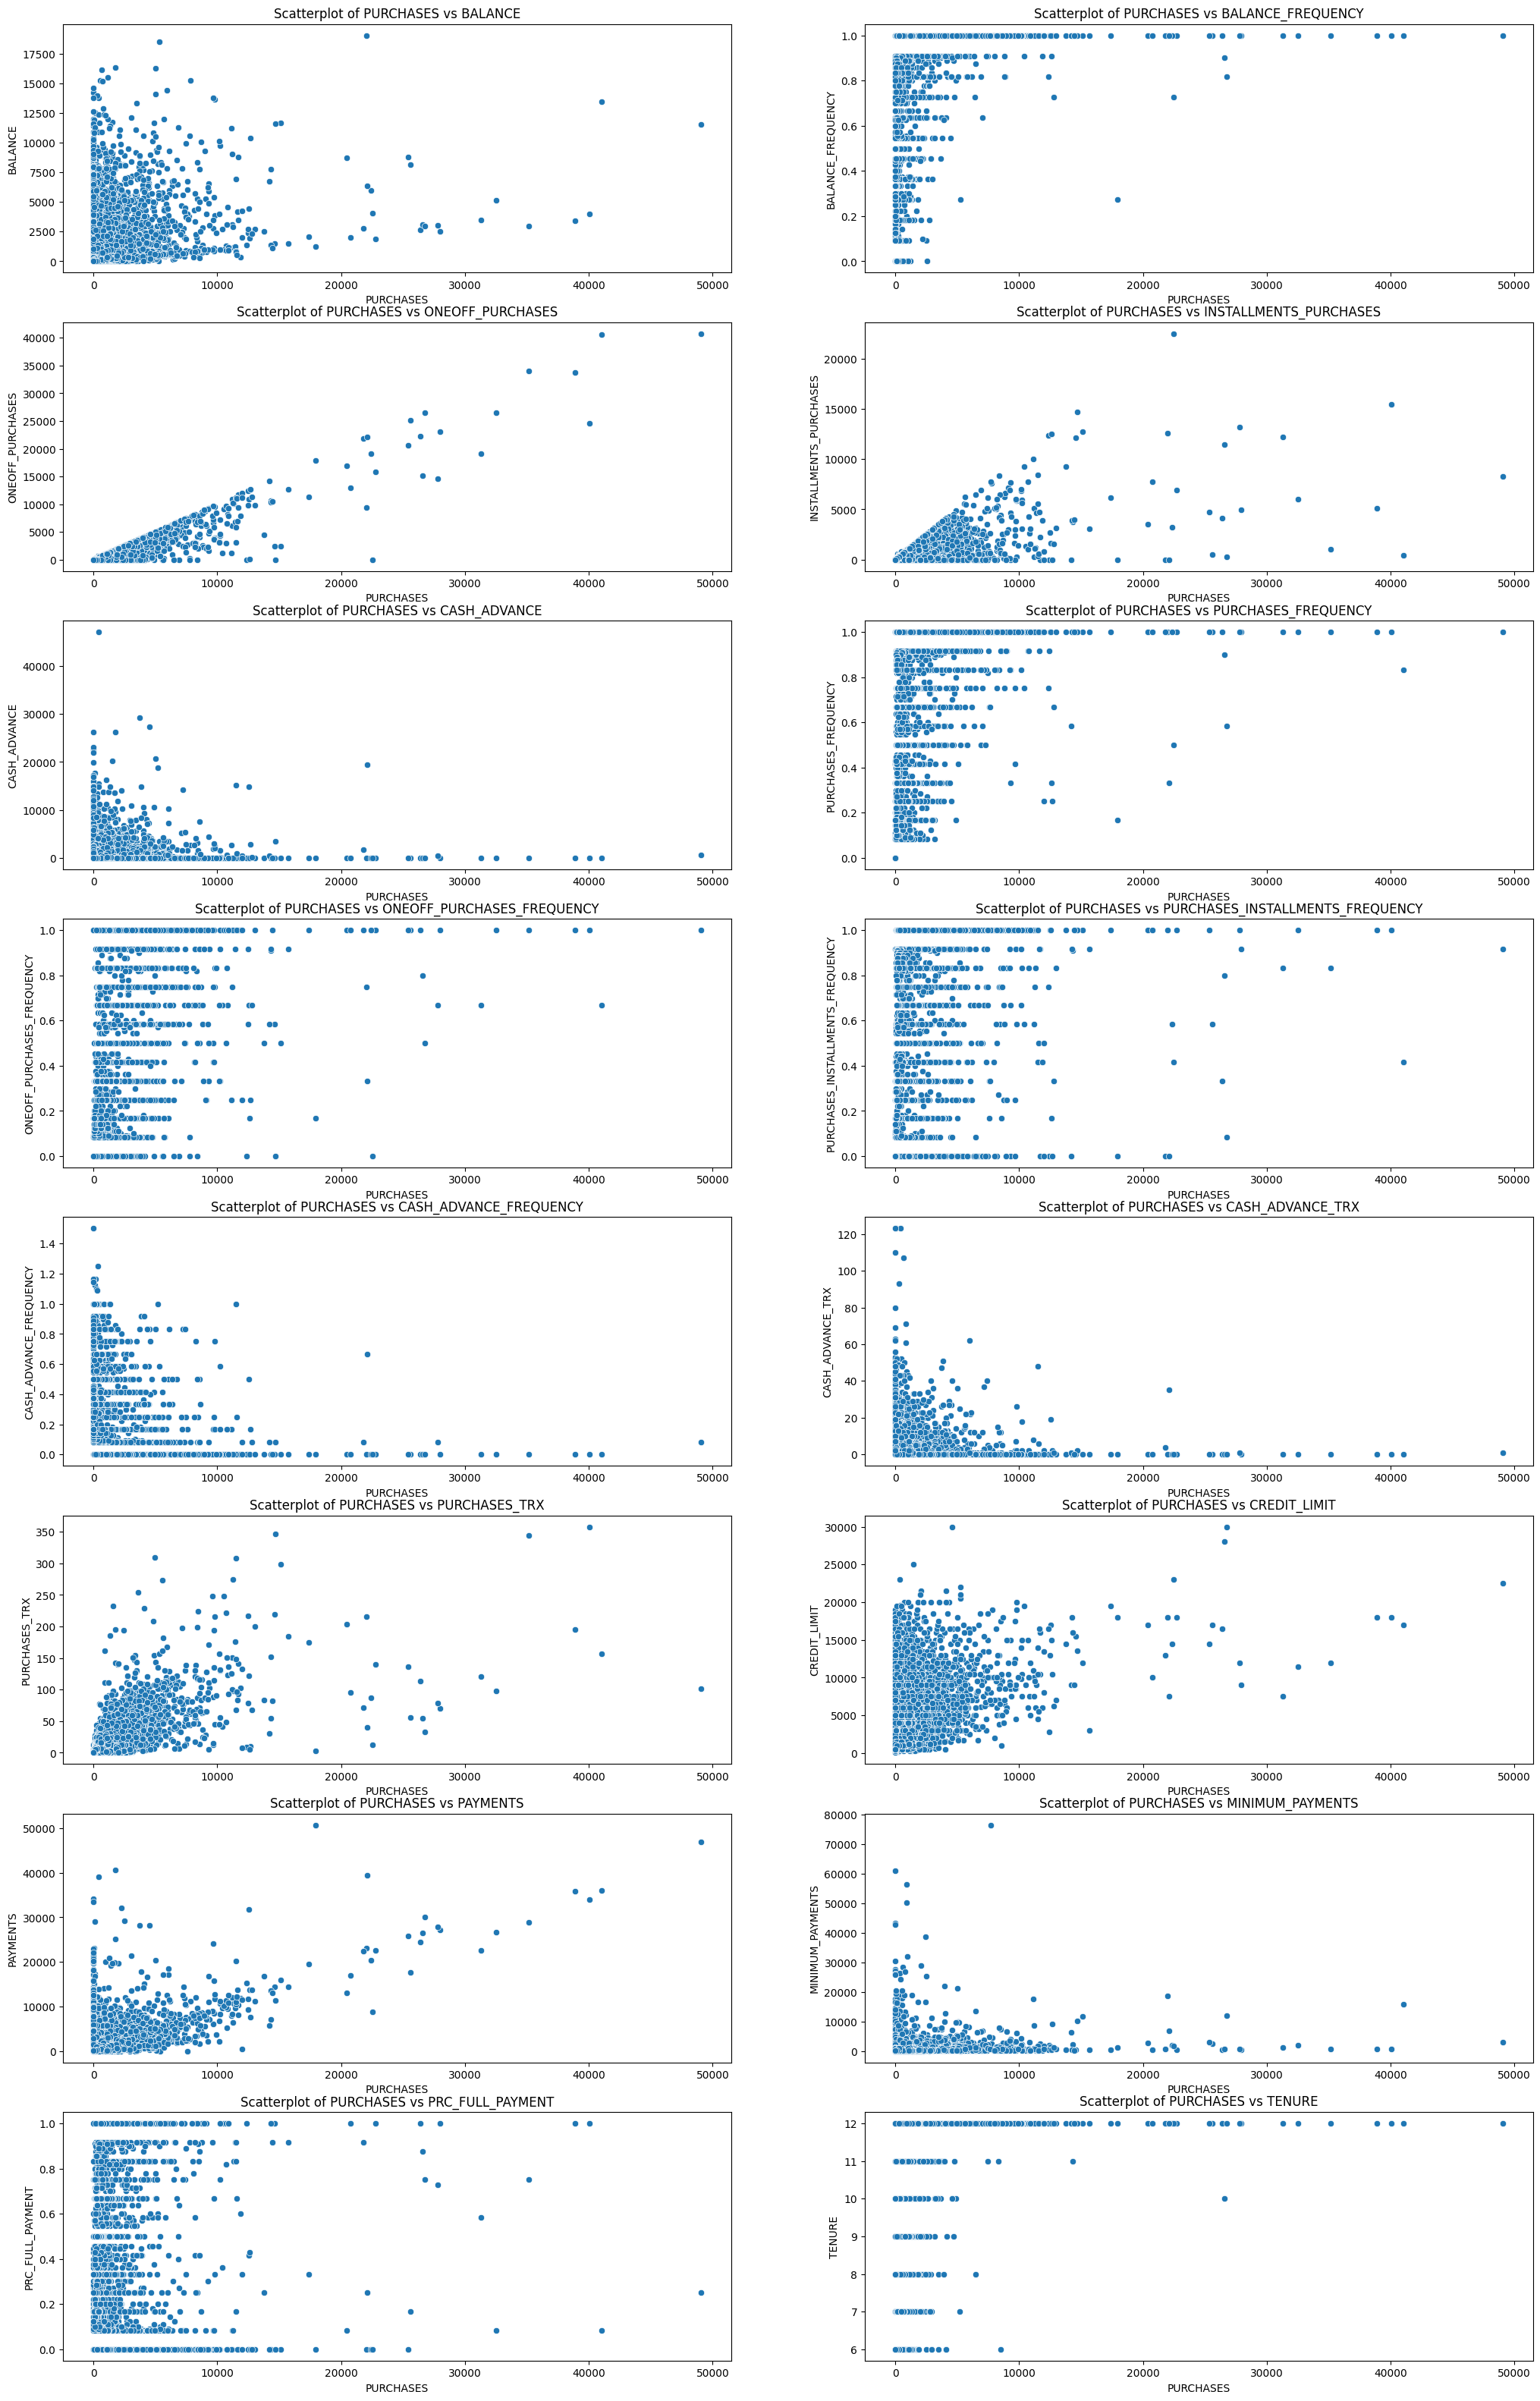

In [13]:
# Drawing scatter plots of every column
columns1=['BALANCE', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']
fig, ax = plt.subplots(8,2,figsize=(25,40))
column2 = columns1.copy()
for i, col in enumerate(column2):
    sns.scatterplot(data, x='PURCHASES', y=col,  ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title(f'Scatterplot of PURCHASES vs {col}')
plt.show()

### Scatter Plot Analysis

In all scatter plots, the x-axis represents **PURCHASES**, and the y-axis shows the relationship of other features with it. The graphs are analyzed row by row, from left to right.

1. **PURCHASES vs BALANCE**: The majority of data is concentrated in the range \(x = [0, 10000]\), \(y = [0, 15000]\), with sporadic points elsewhere.

2. **PURCHASES vs BALANCE_FREQUENCY**: Data mostly clusters below 5000 PURCHASES, and **BALANCE_FREQUENCY** typically lies between \([0.1, 0.9]\), with upward trends observed at **BALANCE_FREQUENCY = 1**.

3. **PURCHASES vs ONEOFF_PURCHASES**: There is a strong linear correlation, with most data in the range \(x = [0, 15000]\), \(y = [0, 15000]\), and scattered outliers.

4. **PURCHASES vs INSTALLMENTS_PURCHASES**: A linear relationship exists, with most data concentrated in the range \(x = [0, 12000]\), \(y = [0, 12000]\).

5. **PURCHASES vs CASH_ADVANCE**: Most data points are near \([x, y] = [15000, 15000]\), along with some notable outliers.

6. **PURCHASES vs FREQUENCIES**: For **PURCHASES_FREQUENCY**, **ONEOFF_PURCHASES_FREQUENCY**, and **PURCHASES_INSTALLMENTS_FREQUENCY**, y-values range between 0 and 1, with most data clustered at \(x < 10000\).

7. Other features such as **CASH_ADVANCE_TRX**, **PURCHASES_TRX**, **CREDIT_LIMIT**, **PAYMENTS**, and **MINIMUM_PAYMENT** show similar patterns, with dense clusters in specific ranges and visible outliers.


BALANCE: 


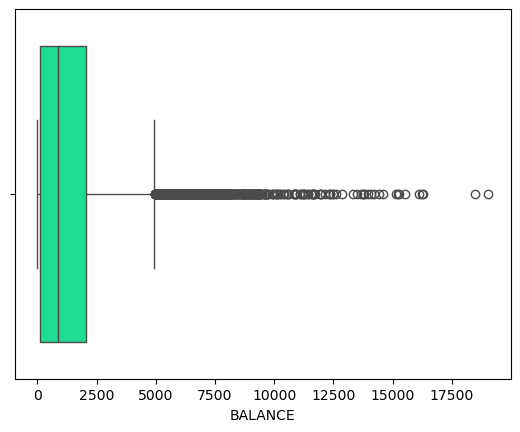

BALANCE_FREQUENCY: 


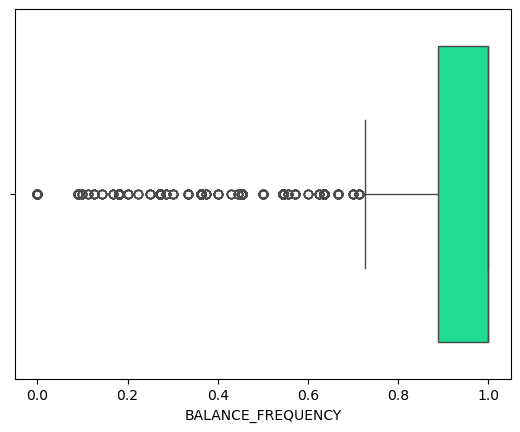

PURCHASES: 


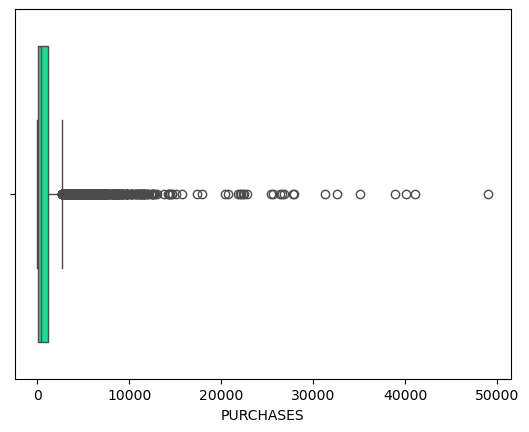

ONEOFF_PURCHASES: 


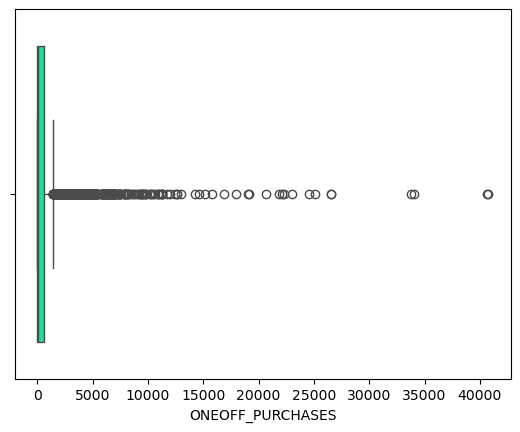

INSTALLMENTS_PURCHASES: 


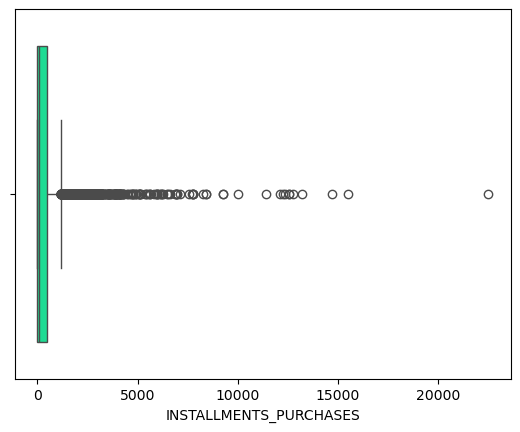

CASH_ADVANCE: 


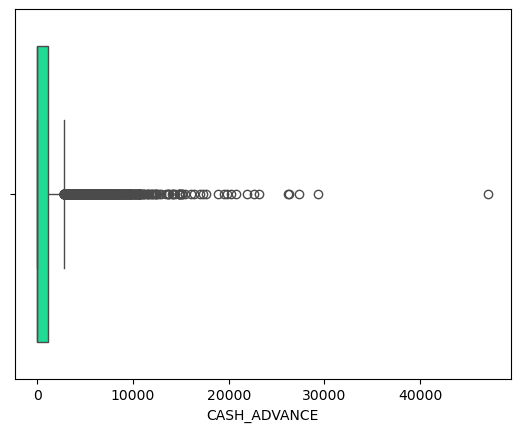

PURCHASES_FREQUENCY: 


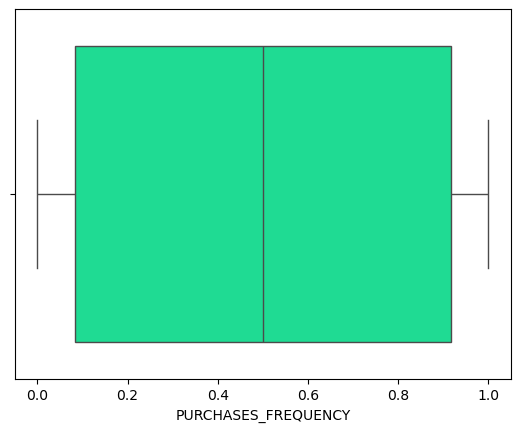

ONEOFF_PURCHASES_FREQUENCY: 


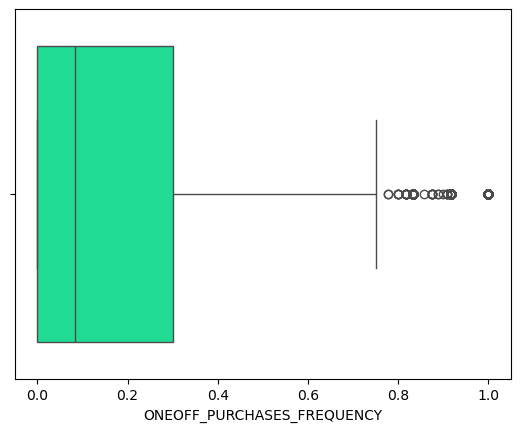

PURCHASES_INSTALLMENTS_FREQUENCY: 


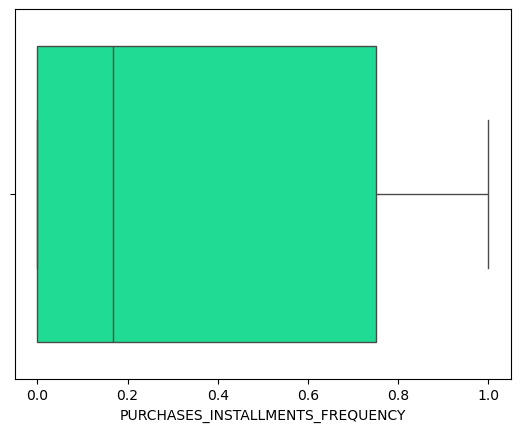

CASH_ADVANCE_FREQUENCY: 


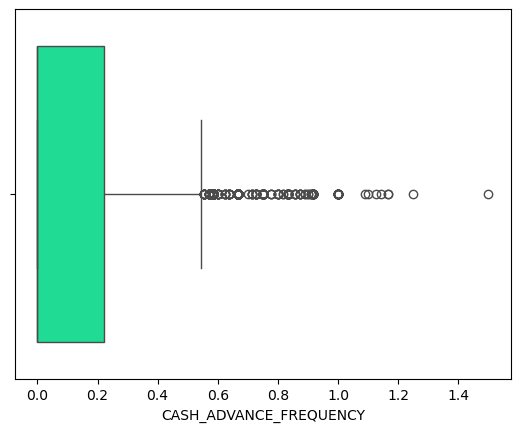

CASH_ADVANCE_TRX: 


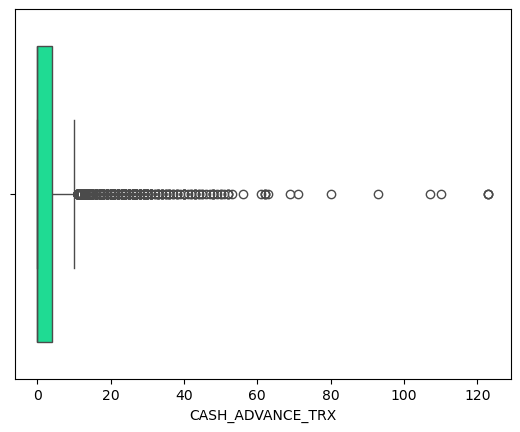

PURCHASES_TRX: 


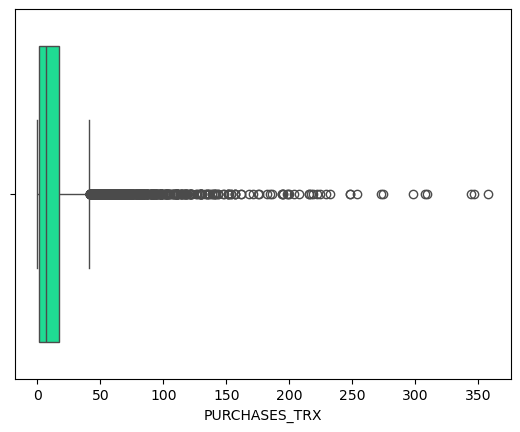

CREDIT_LIMIT: 


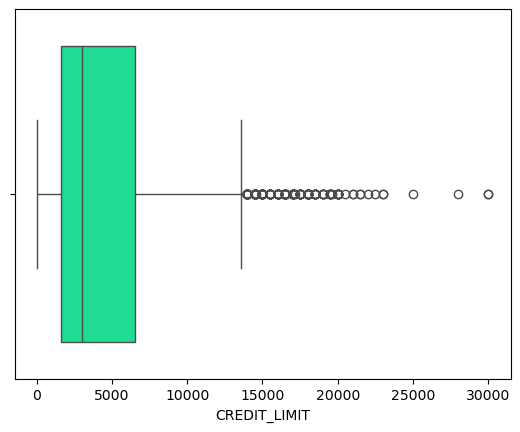

PAYMENTS: 


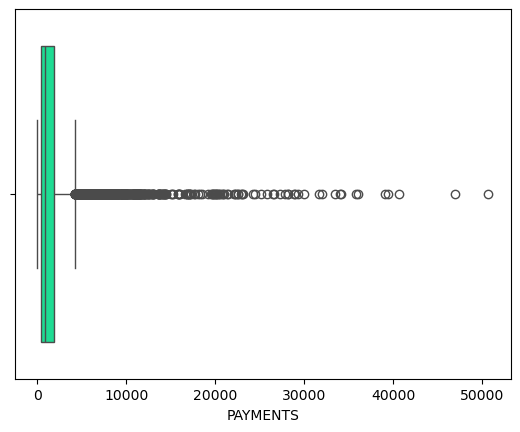

MINIMUM_PAYMENTS: 


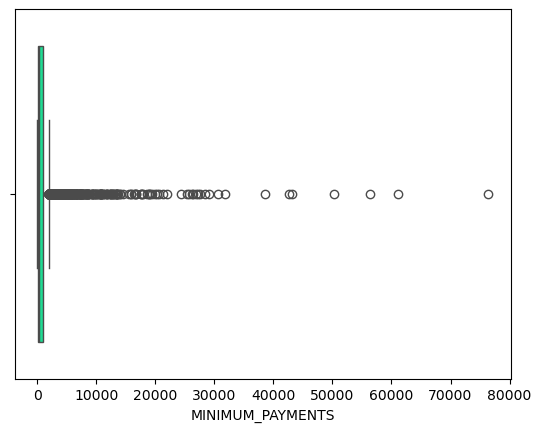

PRC_FULL_PAYMENT: 


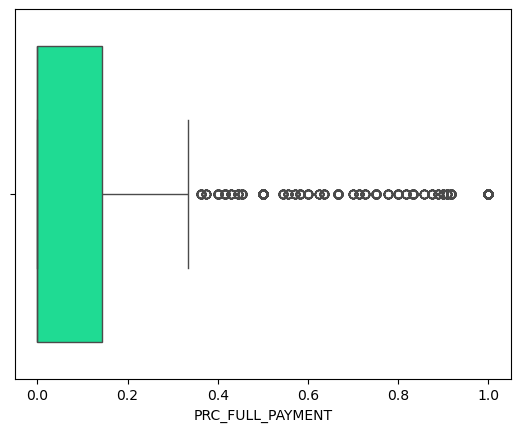

TENURE: 


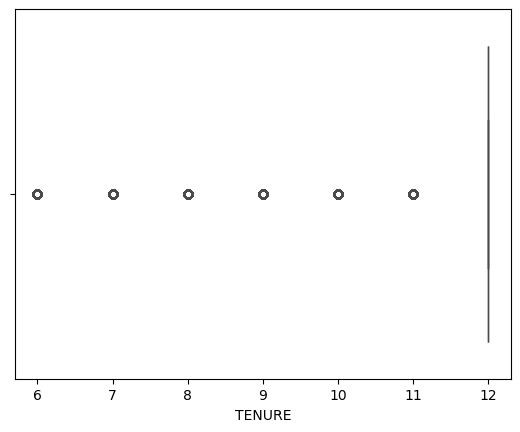

In [ ]:
# Constructing Box plots to check for outliers
list1 = ['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY' ,'CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=data[str(i)],color='mediumspringgreen')
    plt.show()

### Box Plot Analysis

Based on the box plots, it appears that two specific data points (identified by their indices) are outliers. Including these outliers in the dataset could adversely affect the accuracy of the final clustering results.


array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>],
       [<Axes: title={'center': 'ONEOFF_PURCHASES'}>,
        <Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>],
       [<Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>],
       [<Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>],
       [<Axes: title={'center': 'PRC_FULL_PAYMENT'}>,
        <Axes: title={'center': 'TENURE'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <A

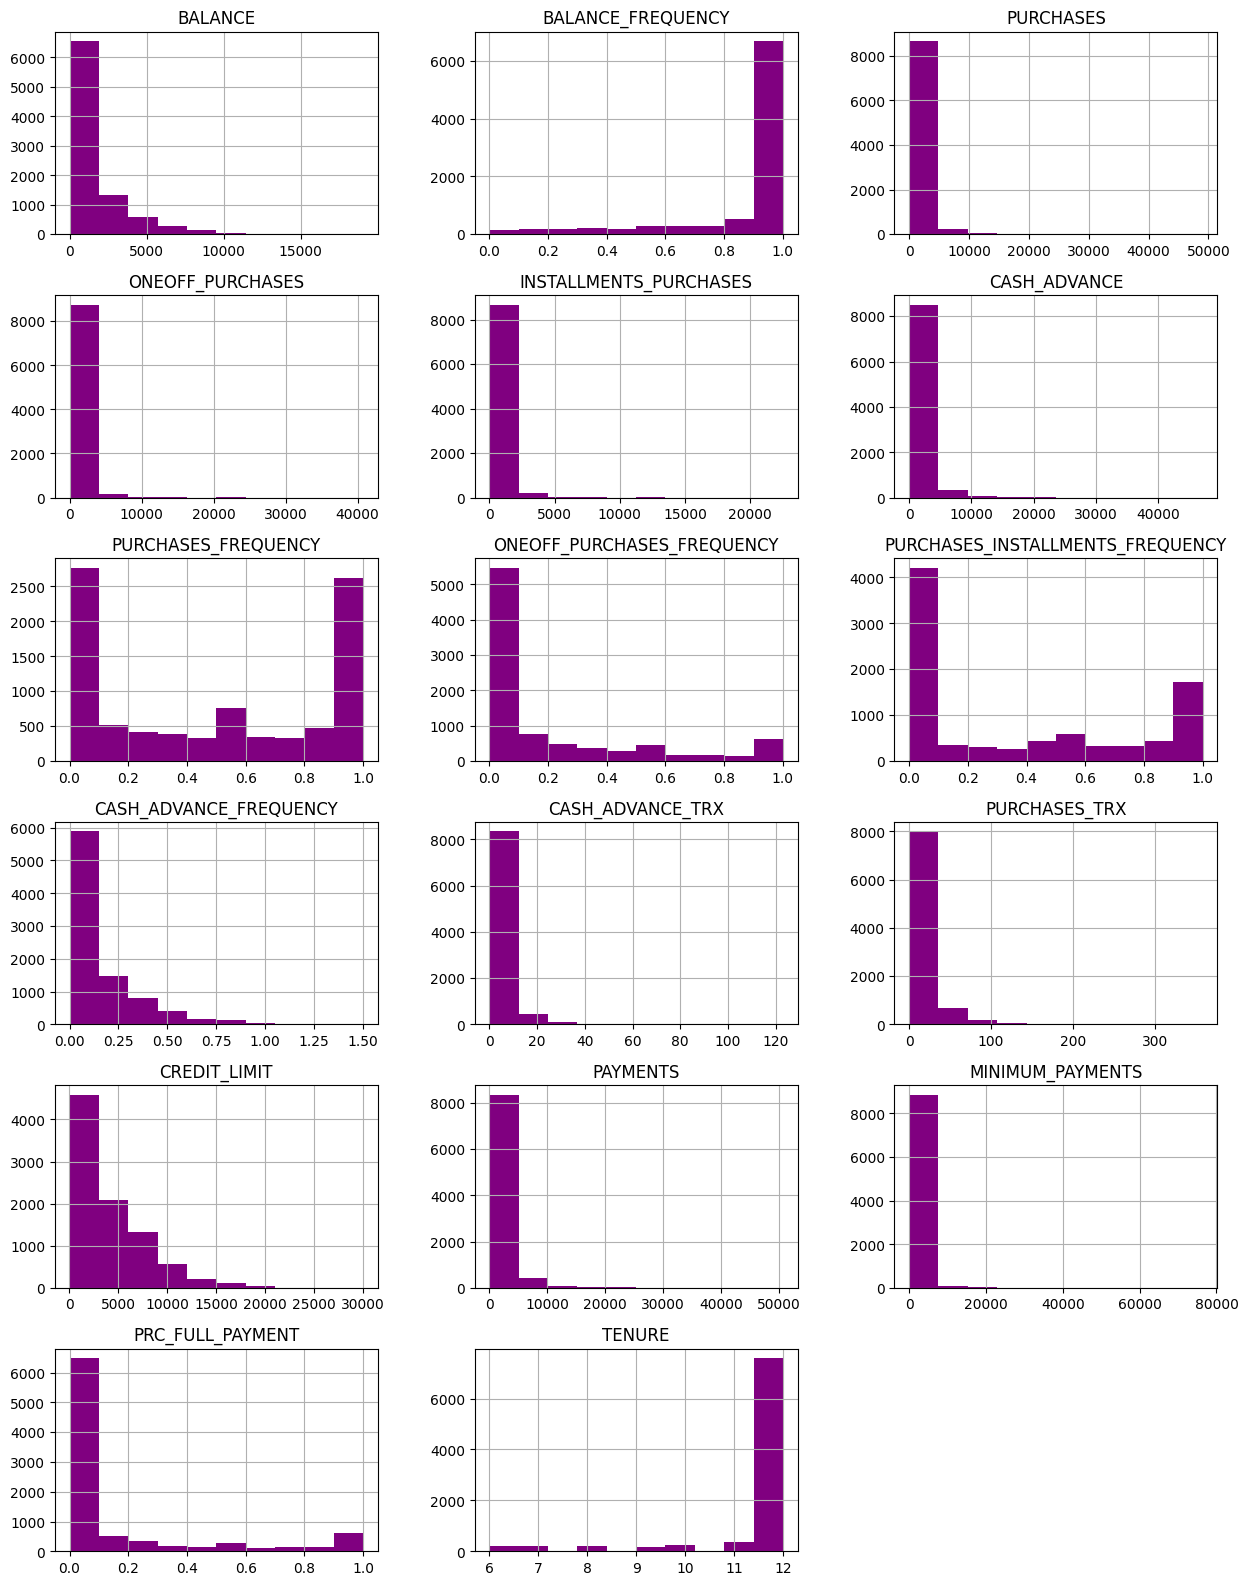

In [14]:
# displaying Histograms

data.hist(figsize=(15,30),layout=(9,3) , color='purple')

### Histogram Analysis

1. The histograms indicate that many features (approximately 13) exhibit a right-skewed distribution.

2. Features such as **BALANCE_FREQUENCY** and **TENURE** display a left-skewed distribution.

3. Features like **PURCHASES_FREQUENCY** and **PURCHASES_INSTALLMENTS_FREQUENCY** show an initial increase followed by a decrease as we move to the right, then rise again with slight fluctuations towards the end.


# 2.A

### Traning KMean to find optimal clusters

In [15]:
kmeans_set={"init":"random", "n_init":10 , "max_iter":300 , "random_state":42}

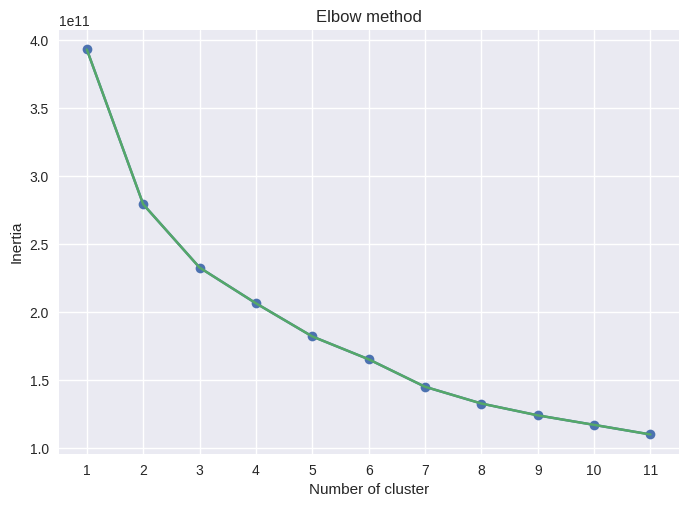

In [16]:
#using Elbow method to show Number of cluster and Inertia
List=[]
for k in range(1,12):
    kmeans=KMeans(n_clusters=k , **kmeans_set)
    kmeans.fit(data)
    List.append(kmeans.inertia_)
plt.style.use("seaborn-v0_8")
plt.plot(range(1,12), List, marker='o')
plt.plot(range(1,12), List)
plt.xticks(range(1,12))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.title('Elbow method')
plt.show()

In [17]:
#Finding the optimal cluster
k1=KneeLocator(range(1,12), List, curve="convex" , direction="decreasing")
k1.elbow

3

In [18]:
# defining scaler and Scaled_features to Normalize the data since it has not showing us the optimal number of clusters
Scaler=StandardScaler()
Scaled_features=Scaler.fit_transform(data)

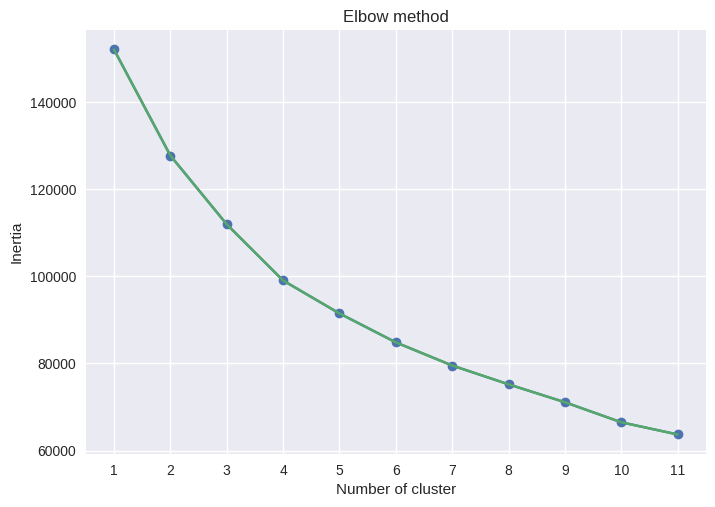

In [19]:
# using Elbow method again to show Number of cluster and Inertia
List=[]
for k in range(1,12):
    kmeans=KMeans(n_clusters=k , **kmeans_set)
    kmeans.fit(Scaled_features)
    List.append(kmeans.inertia_)
plt.style.use("seaborn-v0_8")
plt.plot(range(1,12), List, marker='o')
plt.plot(range(1,12), List)
plt.xticks(range(1,12))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.title('Elbow method')
plt.show()

In [20]:
# Running KneeLocator again to find out optimal number of clusters
k1=KneeLocator(range(1,12), List, curve="convex" , direction="decreasing")
k1.elbow

4

**Visualizing the line at the best number of clusters**

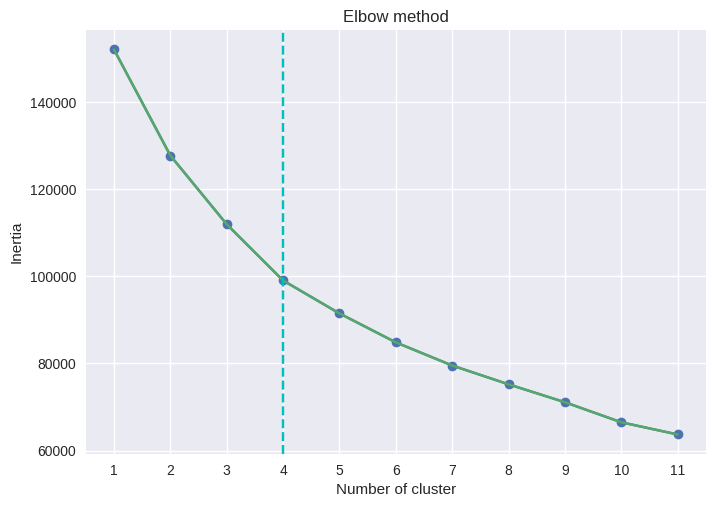

In [21]:
List=[]
for k in range(1,12):
    kmeans=KMeans(n_clusters=k , **kmeans_set)
    kmeans.fit(Scaled_features)
    List.append(kmeans.inertia_)
plt.style.use("seaborn-v0_8")
#plt.style.use("five thirtyeight")
plt.plot(range(1,12), List, marker='o')
plt.plot(range(1,12), List)
plt.xticks(range(1,12))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.title('Elbow method')
plt.axvline(x=k1.elbow , color='c', label= "axvline_fullheight" , ls='--')
plt.show()

In [22]:
#instantiates the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=4, n_init=10, random_state=1)

#fitting k-means algorithm to data
kmeans.fit(Scaled_features)

#viewing cluster assignments for each observation
label_array = kmeans.labels_


In [23]:
#viewing cluster assignments for each observation(in dataframe form)
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,1
1,3
2,0
3,1
4,1
...,...
8945,0
8946,0
8947,0
8948,1


In [24]:
# appending cluster assingments to original DataFrame
data['k-means cluster'] = kmeans.labels_
# viewing updated DataFrame
final_data=pd.DataFrame(data)
final_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,k-means cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


# 2.B

### Training DBSCAN

In [25]:
# Defining ranges for DBSCAN parameters
eps_values = [0.3, 0.5, 0.7, 1.0, 1.5]
min_samples_values = [3, 5, 10]


best_silhouette = -1
best_params = None
best_labels = None

In [26]:
# Iterating over parameter combinations
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(Scaled_features)

        # Ignoring noise points (-1 labels) and cases with fewer than 2 clusters
        num_clusters = len(np.unique(labels[labels != -1]))
        if num_clusters < 2:
            continue

        # Calculating silhouette score
        silhouette = silhouette_score(Scaled_features, labels)
        if silhouette > best_silhouette:
            best_silhouette = silhouette
            best_params = (eps, min_samples)
            best_labels = labels

        print(f"DBSCAN with eps={eps}, min_samples={min_samples} found {num_clusters} clusters, silhouette={silhouette:.2f}")


DBSCAN with eps=0.3, min_samples=3 found 124 clusters, silhouette=-0.48
DBSCAN with eps=0.3, min_samples=5 found 41 clusters, silhouette=-0.42
DBSCAN with eps=0.3, min_samples=10 found 13 clusters, silhouette=-0.40
DBSCAN with eps=0.5, min_samples=3 found 124 clusters, silhouette=-0.52
DBSCAN with eps=0.5, min_samples=5 found 38 clusters, silhouette=-0.44
DBSCAN with eps=0.5, min_samples=10 found 9 clusters, silhouette=-0.29
DBSCAN with eps=0.7, min_samples=3 found 100 clusters, silhouette=-0.51
DBSCAN with eps=0.7, min_samples=5 found 28 clusters, silhouette=-0.44
DBSCAN with eps=0.7, min_samples=10 found 8 clusters, silhouette=-0.30
DBSCAN with eps=1.0, min_samples=3 found 66 clusters, silhouette=-0.42
DBSCAN with eps=1.0, min_samples=5 found 15 clusters, silhouette=-0.25
DBSCAN with eps=1.0, min_samples=10 found 3 clusters, silhouette=0.09
DBSCAN with eps=1.5, min_samples=3 found 18 clusters, silhouette=-0.07
DBSCAN with eps=1.5, min_samples=5 found 6 clusters, silhouette=0.00


In [27]:
# Output of the best parameters and the optimal number of clusters
if best_params:
    best_eps, best_min_samples = best_params
    # Calculating the optimal number of clusters
    dbscan_best = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    best_labels = dbscan_best.fit_predict(Scaled_features)
    optimal_clusters = len(np.unique(best_labels[best_labels != -1]))  # Excluding noise points (-1)

    print(f"Best DBSCAN parameters: eps={best_eps}, min_samples={best_min_samples}, "
          f"silhouette={best_silhouette:.2f}, optimal clusters={optimal_clusters}")
else:
    print("No suitable DBSCAN clustering found.")


Best DBSCAN parameters: eps=1.0, min_samples=10, silhouette=0.09, optimal clusters=3


### Clustering Results:
- **K-Means Clustering without Scaled Data**:
  - Number of clusters = **3**, determined using the Elbow Method.
  - The dataset is grouped into 3 distinct customer segments.


- **K-Means Clustering with Scaled Data**:
  - Number of clusters = **4**, determined using the Elbow Method.
  - The dataset is grouped into 4 distinct customer segments.

- **DBSCAN Clustering**:
  - By tuning `eps` and `min_samples` parameters, the DBSCAN algorithm identifies **3 clusters**.
  - These clusters are based on data density. What appears as noise or outliers in DBSCAN might be part of a cluster in K-Means.

### Conclusion:
- K-Means without Scaling provides **3 clusters**.
- K-Means with Scaling provides **4 clusters** with clear boundaries.
- DBSCAN identifies **3 clusters** by considering the density of the data and structural patterns.


# 2.C

In [28]:
# Performing t-SNE for dimensionality reduction to 2D
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(Scaled_features)

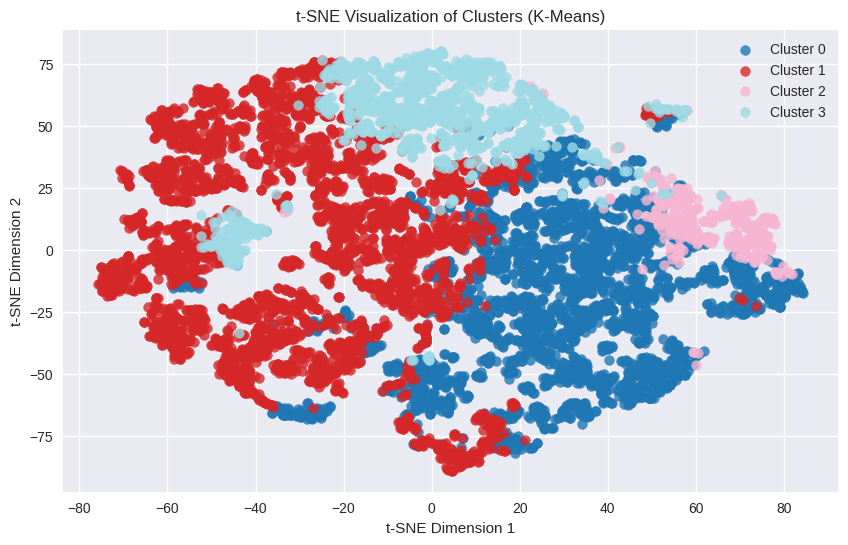

In [29]:
# Setting up a colormap
num_clusters = 4  # Optimal number of clusters
colormap = cm.get_cmap('tab20', num_clusters)


# Creating the plot
plt.figure(figsize=(10, 6))

for cluster in range(num_clusters):
    color = colormap(cluster)  # Getting a distinct color for each cluster
    mask = label_array == cluster  # Boolean mask for the current cluster
    plt.scatter(
        X_embedded[mask, 0],
        X_embedded[mask, 1],
        s=50, c=[color], label=f'Cluster {cluster}', alpha=0.8
    )

# Adding plot details
plt.title("t-SNE Visualization of Clusters (K-Means)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.grid(True)
plt.show()

# 2.D

In [30]:
# seperating 0 cluster to analyse it's properties
cluster_0 = data.loc[data['k-means cluster'] == 0]

In [31]:
cluster_0.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,k-means cluster
count,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.0
mean,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595,0.0
std,1212.134419,0.161833,1041.149669,872.592208,623.932335,602.337305,0.150874,0.353245,0.313701,0.099497,2.029238,15.954692,3261.269960,1275.813034,1776.698287,0.357381,1.248127,0.0
min,0.000000,0.000000,8.400000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.019163,0.000000,6.000000,0.0
25%,80.529535,1.000000,439.960000,0.000000,223.255000,0.000000,0.800000,0.000000,0.545455,0.000000,0.000000,12.000000,1500.000000,456.587019,161.279143,0.000000,12.000000,0.0
50%,337.269567,1.000000,892.300000,168.540000,450.670000,0.000000,1.000000,0.111111,0.833333,0.000000,0.000000,16.000000,3000.000000,938.788924,196.720403,0.083333,12.000000,0.0
75%,1256.639648,1.000000,1772.165000,903.000000,874.375000,0.000000,1.000000,0.583333,1.000000,0.000000,0.000000,28.000000,6000.000000,1778.813262,606.819688,0.500000,12.000000,0.0
max,9502.256762,1.000000,6520.000000,6520.000000,4538.840000,7894.578816,1.000000,1.000000,1.000000,0.750000,23.000000,186.000000,25000.000000,12020.180090,38512.124770,1.000000,12.000000,0.0


In [32]:
# Replacing name of the Cluster_0 column
data['k-means cluster'] = data['k-means cluster'].replace({0: 'Budget Supporters'})

Cluster 0 - "Budget Supporters" This category is characterized by financial prudence coupled with the ability to maintain stability over time. They have a significantly moderate average balance with high balance maintenance frequency which indicates the maintenance of the account balance. This segment is seen making decent to high volumes of one-off purchases as well as inner installment purchases, although they do not tend to get a lot of cash advances. Their spending is frequent since purchases are common although the number of transactions is low overall which shows reasonable and disciplined behavior portraying them as responsible dimensions of credit usage.

In [33]:
# seperating cluster 1 values to analyse its properties
cluster_1 = data.loc[data['k-means cluster'] == 1]

In [34]:
cluster_1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000
mean,1011.751528,0.789871,269.973441,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429
std,1097.368627,0.295184,467.629911,448.020861,155.198248,918.845971,0.188211,0.135703,0.148779,0.136996,2.963950,3.935739,2654.908975,1578.553518,1314.377150,0.205789,1.416399
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000
25%,82.249034,0.545455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,268.254041,160.857255,0.000000,12.000000
50%,763.684601,1.000000,79.100000,0.000000,0.000000,116.886449,0.083333,0.000000,0.000000,0.083333,1.000000,1.000000,2500.000000,534.729290,310.336181,0.000000,12.000000
75%,1505.001170,1.000000,339.767500,211.877500,51.207500,934.970675,0.333333,0.100000,0.083333,0.166667,3.000000,5.000000,4000.000000,1072.484778,657.149667,0.000000,12.000000
max,8115.039014,1.000000,4900.000000,4900.000000,3000.000000,6523.780195,1.000000,1.000000,0.857143,0.857143,23.000000,43.000000,23000.000000,29272.486070,28483.254830,1.000000,12.000000


In [35]:
# Replacing name of the Cluster_1 column
data['k-means cluster'] = data['k-means cluster'].replace({1: 'Cautious Users'})

Cluster 1 - "Cautious Users"
The cluster consists of cautious spenders who exercise prudent financial behavior. They reveal steady though conservative account activity by maintaining an average lower balance with a moderate frequency of balance. There is a very low incidence of cash advances, and the one-off buys are limited to occasional use. In general, their financial habits portray a concern for checking and controlling expenses as well as avoiding risks, thus earmarking their credit usage profile as cautious and rather conservative.

In [36]:
# seperating cluster_2 for analysis
cluster_2 = data.loc[data['k-means cluster'] == 2]

In [37]:
cluster_2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100
std,3344.579386,0.059070,5978.185287,5377.597586,2727.924691,1872.977038,0.134578,0.289475,0.313123,0.153532,6.084375,56.419780,4824.345602,6875.811470,5069.201346,0.392138,0.451093
min,137.636267,0.272727,900.870000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,3.000000,1000.000000,0.000000,108.937025,0.000000,6.000000
25%,881.358988,1.000000,4569.650000,2265.110000,835.800000,0.000000,1.000000,0.583333,0.666667,0.000000,0.000000,52.000000,6000.000000,3597.677582,249.009390,0.000000,12.000000
50%,2492.726282,1.000000,5848.550000,3705.130000,1827.960000,0.000000,1.000000,0.833333,1.000000,0.000000,0.000000,79.000000,9000.000000,5446.940305,726.696049,0.000000,12.000000
75%,5193.415429,1.000000,8533.540000,6206.990000,3176.000000,283.476295,1.000000,1.000000,1.000000,0.083333,1.000000,110.000000,12000.000000,8337.882098,1912.298544,0.666667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,19513.474830,1.000000,1.000000,1.000000,1.000000,62.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [38]:
# Replacing name of the Cluster_2 column
data['k-means cluster'] = data['k-means cluster'].replace({2: 'Reckless Spenders'})

Cluster 2 - "Reckless Spenders" This type of group is classified as aggressive and impulsive spending behavior. They have a low average balance; however, they also exhibit high purchase frequency and engagement in one-off and installment purchases. It often uses cash advance; this means that the individual tends to overspend or live on borrowed money. In the long run, their spending behavior could prove detrimental to them and expose them to some form of stress or instability in their finances.

In [39]:
# seperating column_3 for analysis
cluster_3 = data.loc[data['k-means cluster'] == 3]

In [40]:
cluster_3.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000
mean,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312
std,2754.575494,0.091212,862.938799,666.283102,416.133434,3622.443388,0.354104,0.228871,0.311182,0.228421,12.299926,14.043625,3744.186712,4210.279433,3888.093906,0.103212,1.471048
min,78.114579,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,16.950090,0.000000,6.000000
25%,2480.135387,1.000000,0.000000,0.000000,0.000000,2321.162031,0.000000,0.000000,0.000000,0.333333,7.000000,0.000000,5000.000000,1214.469989,752.614680,0.000000,12.000000
50%,4275.708869,1.000000,85.730000,0.000000,0.000000,3653.331329,0.083333,0.000000,0.000000,0.500000,11.500000,1.000000,7000.000000,1963.135909,1309.935203,0.000000,12.000000
75%,6239.276755,1.000000,654.852500,330.352500,144.625000,5592.000447,0.571429,0.166667,0.333333,0.666667,17.000000,10.000000,10000.000000,4021.265959,2043.939591,0.000000,12.000000
max,16304.889250,1.000000,7194.530000,6678.260000,4059.930000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,142.000000,21500.000000,39048.597620,61031.618600,1.000000,12.000000


In [ ]:
# Replacing name of the Cluster_2 column
data['k-means cluster'] = data['k-means cluster'].replace({3: 'Occasional Spenders'})

Cluster 3 - “Occasional Spenders” This cluster consists of people who spend money from time to time. Their average balance is low, and purchases made, either single or bought out installments, are few and far between. Use of cash advances is uncommon, and overall purchase activity is low. Their spending patterns indicate very little use of credit card facilities, perhaps due to shallow financial needs or a choice of using other cash alternatives. In this group credit is used sparingly and in most cases, only in extreme measures.

In [45]:
# seperating features and target column
features = data.drop('k-means cluster', axis=1)
target = data['k-means cluster']

# 3.A

In [46]:
# Normalizing each variable independently
scaler = StandardScaler()  # Standardization to zero mean, unit variance
normalized_data = scaler.fit_transform(features)

In [54]:
# Training PCA on the normalized variables
pca = PCA()  # Initializing PCA
pca.fit(Scaled_features)  # Fitting PCA to the data

PCA()

In [55]:
# Variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

In [56]:
# Printing results
print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Variance Explained:", cumulative_variance)

Explained Variance Ratio: [2.72900372e-01 2.03019913e-01 8.79197942e-02 7.47997501e-02
 6.26279204e-02 5.75021130e-02 4.88723465e-02 4.25748554e-02
 3.82880445e-02 3.08000623e-02 2.37189738e-02 1.77363236e-02
 1.42649186e-02 1.21736915e-02 1.01298988e-02 2.67033632e-03
 6.85223467e-07]
Cumulative Variance Explained: [0.27290037 0.47592029 0.56384008 0.63863983 0.70126775 0.75876986
 0.80764221 0.85021707 0.88850511 0.91930517 0.94302415 0.96076047
 0.97502539 0.98719908 0.99732898 0.99999931 1.        ]


# 3.B

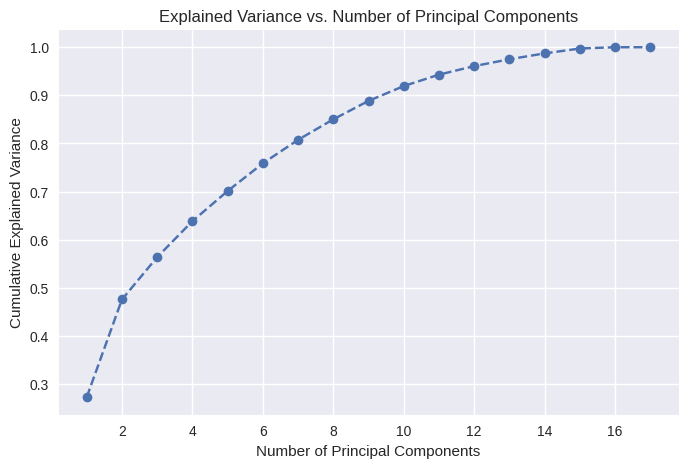

In [57]:
# Plotting the Cumulative Variance Explained
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

# 3.C

In [62]:
# Reconstructing Data with Different Numbers of Components
mse_list = []
for n_components in range(1, len(features.columns) + 1):
    pca = PCA(n_components=n_components) # giving the values of the number of features we have
    reduced_data = pca.fit_transform(normalized_data)
    reconstructed_data = pca.inverse_transform(reduced_data)

    # Computing MSE between original and reconstructed data
    mse = mean_squared_error(normalized_data, reconstructed_data)
    mse_list.append(mse)

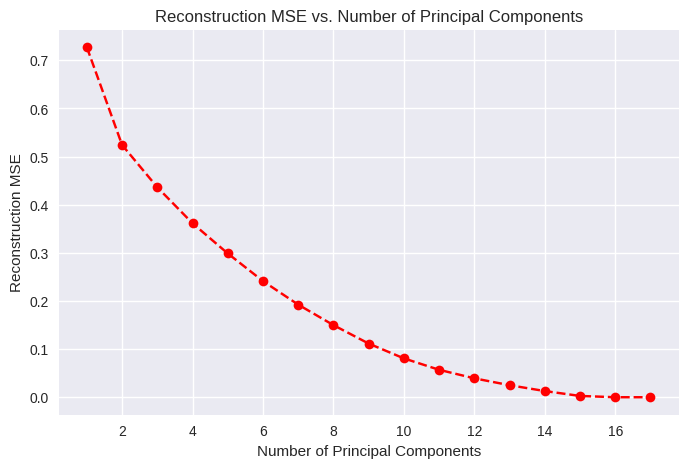

In [63]:
# Plotting MSE for different numbers of PCA components
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(mse_list) + 1), mse_list, marker='o', linestyle='--', color='r')
plt.xlabel('Number of Principal Components')
plt.ylabel('Reconstruction MSE')
plt.title('Reconstruction MSE vs. Number of Principal Components')
plt.grid(True)
plt.show()